# üéì **Taller 2.1: An√°lisis Exploratorio - Dataset Titanic**
## üìä Estad√≠sticas Descriptivas Generales, Univariables y Multivariables

## OBJETIVOS DEL TALLER:
* ‚úÖ Obtener estad√≠sticas descriptivas generales del dataset
* ‚úÖ Analizar variables individuales (univariables)
* ‚úÖ Explorar relaciones entre variables (multivariables)
* ‚úÖ Practicar visualizaciones b√°sicas
* ‚úÖ Preparar datos para an√°lisis avanzados

## üìù INSTRUCCIONES PARA ENTREGA:

1. **GUARDA ESTE NOTEBOOK** en tu Google Drive siguiendo esta convencion para el nombre del archivo:  NombreApellidoAnalisisExploratorioTitanic.ipynb
2. **COMPLETA TODOS LOS TODOs** en las celdas siguientes
3. **EJECUTA TODAS LAS CELDAS** y verifica que funcionen

üéì **R√öBRICA DE EVALUACI√ìN:**
- ‚úÖ C√≥digo completo y funcional (50%)
- ‚úÖ An√°lisis correcto de estad√≠sticas (30%)
- ‚úÖ Visualizaciones adecuadas (10%)
- ‚úÖ Reporte claro de hallazgos (10%)

# üîß **CONFIGURACI√ìN INICIAL**

In [2]:
# Configuraci√≥n e importaci√≥n de librer√≠as
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import os

# Configurar estilo de gr√°ficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Montar Google Drive
drive.mount('/content/drive')
#CURSO = "AprendizajeAutomatico2025"
BASE_FOLDER = "/content/drive/MyDrive/Clases Universidad/Septimo/Aprendizaje/"
#RUTA_CURSO = os.path.join(BASE_FOLDER, CURSO)

# Crear directorio
os.makedirs(BASE_FOLDER, exist_ok=True)

Mounted at /content/drive


# üìÅ **LECTURA DEL DATASET**

In [5]:
# Cargar dataset Titanic
def cargar_dataset():
    try:
      path = BASE_FOLDER + '/datasets/titanic.csv'
      df = pd.DataFrame(pd.read_csv(path))
      return df
    except:
        try:
            # Intentar cargar desde URL alternativa
            url = "https://github.com/FrancisPulles/aprendizaje-automatico-252601/blob/main/02-PREPROCESAMIENTO/data/titanic.csv"
            df = pd.read_csv(url)
            print("‚úÖ Dataset cargado desde URL GitHub")
            return df
        except:
            print("‚ùå No se pudo cargar el dataset")
            return None

In [6]:
# Cargar dataset
titanic_df = cargar_dataset()

if titanic_df is not None:
    print(f"üìä Dataset cargado: {titanic_df.shape[0]} filas, {titanic_df.shape[1]} columnas")
    print("üîç Primeras filas:")
    display(titanic_df.head())
else:
    print("‚ö†Ô∏è No se pudo cargar el dataset. Revisa la ruta en Drive.")

üìä Dataset cargado: 891 filas, 12 columnas
üîç Primeras filas:


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

# üéØ **EJERCICIO 1: ESTAD√çSTICAS DESCRIPTIVAS GENERALES**

In [27]:
def obtener_estadisticas_generales(df):
    estadisticas = {}
    # TODO 1.1: Obtener n√∫mero total de pasajeros
    estadisticas['total_pasajeros'] = df.shape[0] # ‚Üê COMPLETAR

    # TODO 1.2: Obtener n√∫mero de columnas
    estadisticas['total_columnas'] =  df.shape[1]# ‚Üê COMPLETAR

    # TODO 1.3: Obtener tipos de datos √∫nicos
    estadisticas['tipos_datos'] =    df.dtypes.unique()   # ‚Üê COMPLETAR

    # TODO 1.4: Calcular porcentaje de supervivencia general
    estadisticas['tasa_supervivencia'] = df['Survived'].value_counts(normalize=True)[1]*100  # ‚Üê COMPLETAR

    return estadisticas

In [28]:
# Ejecutar funciones
print("üîç Ejecutando an√°lisis general...")
estadisticas = obtener_estadisticas_generales(titanic_df)

# Mostrar resultados
print("\n" + "=" * 40)
print("üìà ESTAD√çSTICAS CALCULADAS")
print("=" * 40)
for key, value in estadisticas.items():
    print(f"{key}: {value}")

üîç Ejecutando an√°lisis general...

üìà ESTAD√çSTICAS CALCULADAS
total_pasajeros: 891
total_columnas: 12
tipos_datos: [dtype('int64') dtype('O') dtype('float64')]
tasa_supervivencia: 38.38383838383838


# üìà **EJERCICIO 2: AN√ÅLISIS UNIVARIABLE**

In [65]:
def analisis_univariable(df, columna):
    """
    Realiza an√°lisis univariable para una columna espec√≠fica
    Argumentos:
        df (DataFrame): Dataset
        columna (str): Nombre de la columna a analizar
    Retorna:
        dict: Estad√≠sticas univariables
    """
    stats = {}

    # TODO 2.1: Obtener tipo de dato de la columna
    stats['tipo_dato'] = df[columna].dtype  # ‚Üê COMPLETAR

    if df[columna].dtype in ['int64', 'float64']:
        # Para variables num√©ricas
        # TODO 2.2: Calcular medidas de tendencia central
        stats['media'] = df[columna].mean()      # ‚Üê COMPLETAR
        stats['mediana'] = df[columna].median()    # ‚Üê COMPLETAR
        stats['moda'] = df[columna].mode().iloc[0]       # ‚Üê COMPLETAR

        # TODO 2.3: Calcular medidas de dispersi√≥n
        stats['desviacion_std'] = df[columna].std()  # ‚Üê COMPLETAR
        stats['rango'] = df[columna].max() - df[columna].min()           # ‚Üê COMPLETAR
        stats['q1'] = df[columna].quantile(0.25)              # ‚Üê COMPLETAR
        stats['q3'] = df[columna].quantile(0.75)             # ‚Üê COMPLETAR
        stats['IQR'] = df[columna].quantile(0.75) - df[columna].quantile(0.25)             # ‚Üê COMPLETAR

    else:
        # Para variables categ√≥ricas
        # TODO 2.4: Calcular frecuencias
        stats['valores_unicos'] =  df[columna].unique()     # ‚Üê COMPLETAR
        stats['frecuencias'] =  df[columna].value_counts().to_dict()        # ‚Üê COMPLETAR
        stats['valor_mas_frecuente'] = df[columna].mode().iloc[0]  # ‚Üê COMPLETAR

    return stats

In [66]:
def visualizar_univariable(df, columna):
    """
    Crea visualizaci√≥n para an√°lisis univariable
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    if df[columna].dtype in ['int64', 'float64']:
        # TODO 2.5: Crear histograma y boxplot para num√©ricas
        # Histograma
        ax1.hist(df[columna].dropna(), bins=20, alpha=0.7, edgecolor='black') # ‚Üê COMPLETAR
        ax1.set_title(f'Distribuci√≥n de {columna}')
        ax1.set_xlabel(columna)
        ax1.set_ylabel('Frecuencia')

        # Boxplot
        ax2.boxplot(df[columna].dropna()) # ‚Üê COMPLETAR
        ax2.set_title(f'Boxplot de {columna}')
        ax2.set_ylabel(columna)

    else:
        # TODO 2.6: Crear gr√°fico de barras para categ√≥ricas
        counts = df[columna].value_counts() # ‚Üê COMPLETAR
        counts.plot(kind='bar', ax=ax1)
        ax1.set_title(f'Frecuencia de {columna}')
        ax1.set_xlabel(columna)
        ax1.set_ylabel('Frecuencia')
        plt.xticks(rotation=45)

        # Pie chart
        top_categories = counts.head(5)
        ax2.pie(top_categories.values, labels=top_categories.index, autopct='%1.1f%%')
        ax2.set_title(f'Top 5 categor√≠as - {columna}')

    plt.tight_layout()
    plt.show()

üîç AN√ÅLISIS UNIVARIABLE

üìä AN√ÅLISIS DE: AGE
Estad√≠sticas:
  tipo_dato: float64
  media: 29.69911764705882
  mediana: 28.0
  moda: 24.0
  desviacion_std: 14.526497332334044
  rango: 79.58
  q1: 20.125
  q3: 38.0
  IQR: 17.875


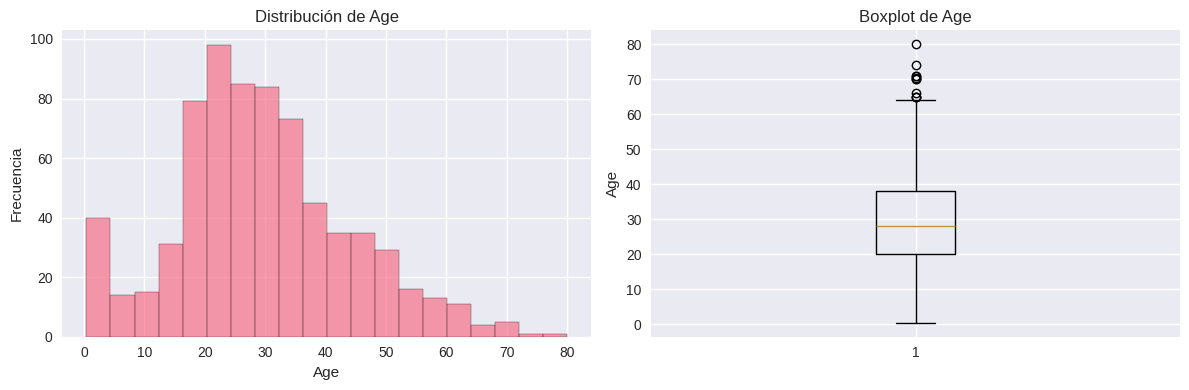


üìä AN√ÅLISIS DE: FARE
Estad√≠sticas:
  tipo_dato: float64
  media: 32.204207968574636
  mediana: 14.4542
  moda: 8.05
  desviacion_std: 49.693428597180905
  rango: 512.3292
  q1: 7.9104
  q3: 31.0
  IQR: 23.0896


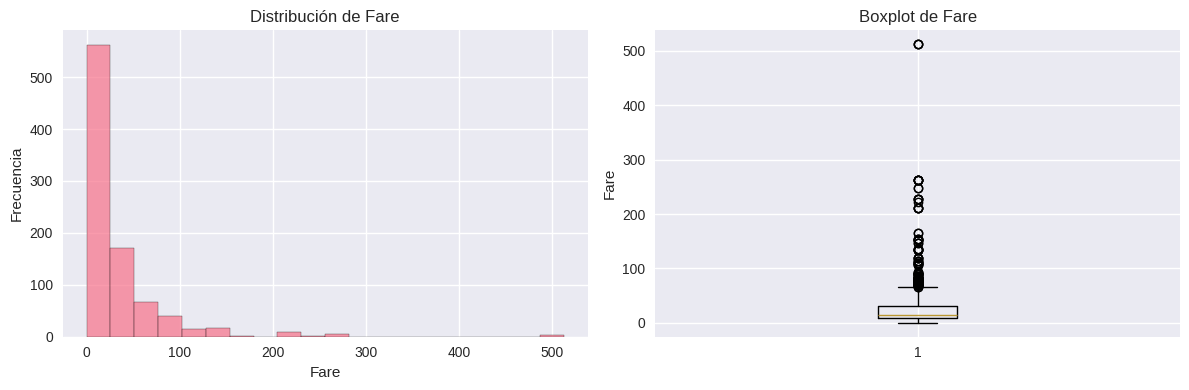


üìä AN√ÅLISIS DE: SEX
Estad√≠sticas:
  tipo_dato: object
  valores_unicos: ['male' 'female']
  frecuencias: {'male': 577, 'female': 314}
  valor_mas_frecuente: male


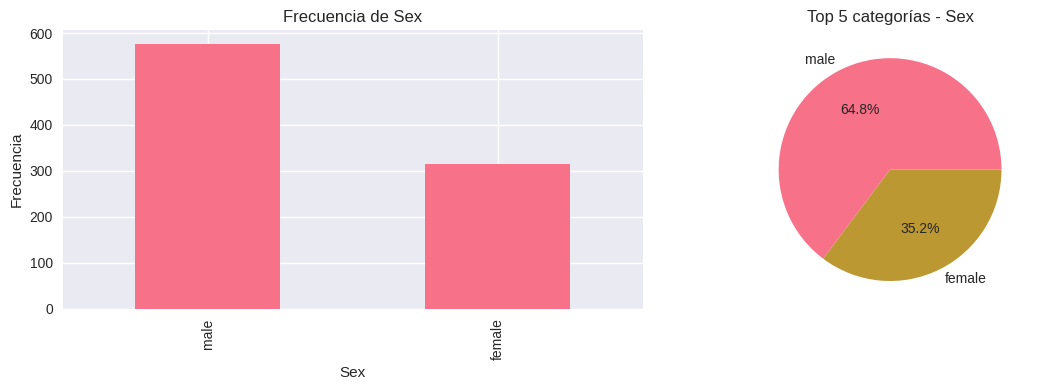


üìä AN√ÅLISIS DE: PCLASS
Estad√≠sticas:
  tipo_dato: int64
  media: 2.308641975308642
  mediana: 3.0
  moda: 3
  desviacion_std: 0.8360712409770513
  rango: 2
  q1: 2.0
  q3: 3.0
  IQR: 1.0


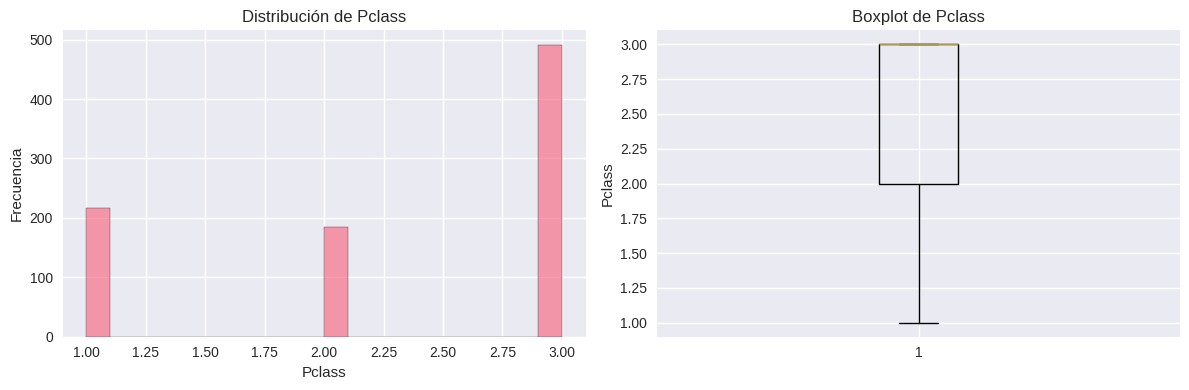

In [67]:
# An√°lisis para variables espec√≠ficas
print("üîç AN√ÅLISIS UNIVARIABLE")
variables_analizar = ['Age', 'Fare', 'Sex', 'Pclass']

for var in variables_analizar:
    if var in titanic_df.columns:
        print(f"\n" + "="*50)
        print(f"üìä AN√ÅLISIS DE: {var.upper()}")
        print("="*50)

        stats = analisis_univariable(titanic_df, var)
        print("Estad√≠sticas:")
        for key, value in stats.items():
            print(f"  {key}: {value}")

        visualizar_univariable(titanic_df, var)
    else:
        print(f"‚ùå Columna '{var}' no encontrada")

# üîÑ **EJERCICIO 3: AN√ÅLISIS MULTIVARIABLE**

In [68]:
def analisis_multivariable(df):
    """
    Realiza an√°lisis de relaciones entre variables
    """
    print("üîç INICIANDO AN√ÅLISIS MULTIVARIABLE")

    # TODO 3.1: Matriz de correlaci√≥n para variables num√©ricas
    print("1. MATRIZ DE CORRELACI√ìN:")
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    correlation_matrix = df[numeric_cols].corr()  # ‚Üê COMPLETAR
    print(correlation_matrix)

    # Visualizar matriz de correlaci√≥n
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)  # ‚Üê COMPLETAR
    plt.title('Matriz de Correlaci√≥n - Variables Num√©ricas')
    plt.show()

    # TODO 3.2: Supervivencia por clase y g√©nero
    print("\n2. SUPERVIVENCIA POR CLASE Y G√âNERO:")
    survival_pivot = df.pivot_table(
        values='Survived',
        index='Pclass',
        columns='Sex',
        aggfunc='mean'
    )
    print(survival_pivot)

    # Visualizar
    plt.figure(figsize=(10, 6))
    survival_pivot.plot(kind='bar')
    plt.title('Tasa de Supervivencia por Clase y G√©nero')
    plt.ylabel('Tasa de Supervivencia')
    plt.xlabel('Clase')
    plt.legend(title='G√©nero')
    plt.show()

    # TODO 3.3: Distribuci√≥n de edad por supervivencia y clase
    print("\n3. DISTRIBUCI√ìN DE EDAD POR SUPERVIVENCIA:")
    plt.figure(figsize=(12, 6))

    # Crear subgr√°ficos
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Boxplot: Edad vs Supervivencia
    df.boxplot(column='Age', by='Survived', ax=axes[0])
    axes[0].set_title('Distribuci√≥n de Edad por Supervivencia')

    # Violin plot: Edad por clase y supervivencia
    sns.violinplot(x='Pclass', y='Age', hue='Survived',
                   data=df, split=True, ax=axes[1])
    axes[1].set_title('Edad por Clase y Supervivencia')

    plt.tight_layout()
    plt.show()

üîç INICIANDO AN√ÅLISIS MULTIVARIABLE
1. MATRIZ DE CORRELACI√ìN:
             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


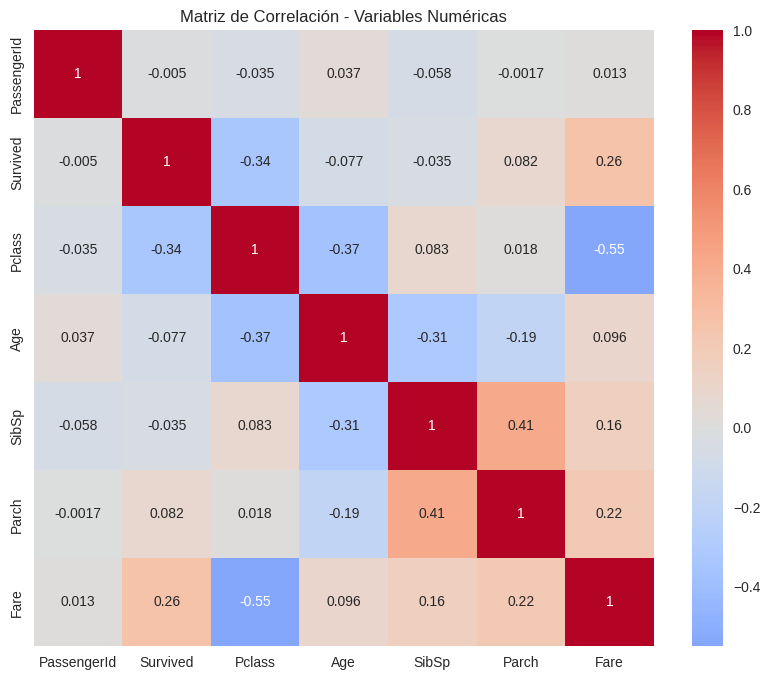


2. SUPERVIVENCIA POR CLASE Y G√âNERO:
Sex       female      male
Pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447


<Figure size 1000x600 with 0 Axes>

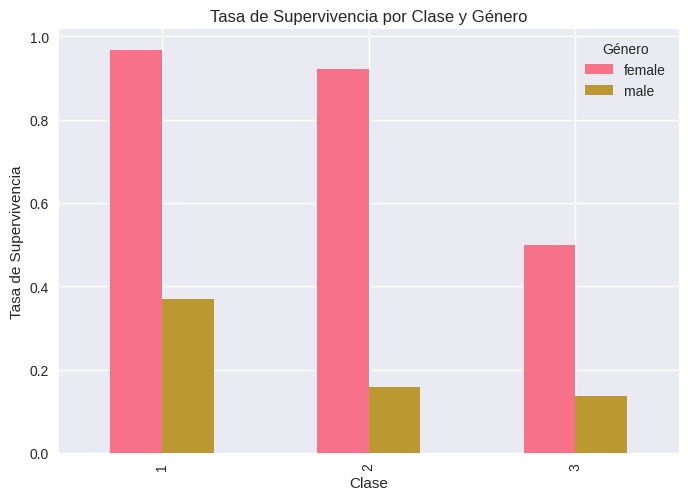


3. DISTRIBUCI√ìN DE EDAD POR SUPERVIVENCIA:


<Figure size 1200x600 with 0 Axes>

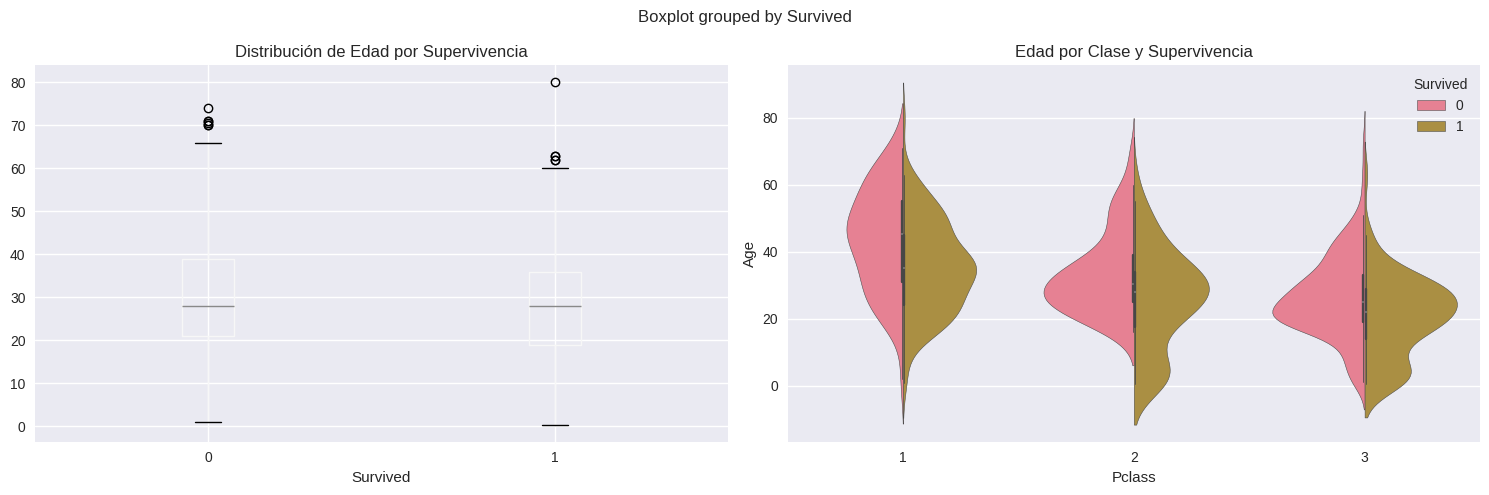

In [69]:
# Ejecutar an√°lisis multivariable
analisis_multivariable(titanic_df)

# ‚úÖ **EJERCICIO 4: REPORTE FINAL - CONCLUSIONES**

In [74]:
def generar_reporte_final():
    """
    Genera un reporte final con los hallazgos principales
    """
    print("üìã GENERANDO REPORTE FINAL")
    print("=" * 60)

    # Hallazgos principales
    print("üéØ HALLAZGOS PRINCIPALES:")
    print(f"1. Total de pasajeros: {len(titanic_df)}")
    print(f"2. Tasa general de supervivencia: {titanic_df['Survived'].mean():.2%}")
    print(f"3. Edad promedio: {titanic_df['Age'].mean():.1f} a√±os")
    print(f"4. Tarifa promedio: ${titanic_df['Fare'].mean():.2f}")

    # An√°lisis por g√©nero
    survival_by_sex = titanic_df.groupby('Sex')['Survived'].mean()
    print(f"5. Supervivencia por g√©nero:")
    for sex, rate in survival_by_sex.items():
        print(f"   - {sex}: {rate:.2%}")

    # An√°lisis por clase
    survival_by_class = titanic_df.groupby('Pclass')['Survived'].mean()
    print(f"6. Supervivencia por clase:")
    for pclass, rate in survival_by_class.items():
        print(f"   - Clase {pclass}: {rate:.2%}")

In [75]:
# Generar reporte
generar_reporte_final()

üìã GENERANDO REPORTE FINAL
üéØ HALLAZGOS PRINCIPALES:
1. Total de pasajeros: 891
2. Tasa general de supervivencia: 38.38%
3. Edad promedio: 29.7 a√±os
4. Tarifa promedio: $32.20
5. Supervivencia por g√©nero:
   - female: 74.20%
   - male: 18.89%
6. Supervivencia por clase:
   - Clase 1: 62.96%
   - Clase 2: 47.28%
   - Clase 3: 24.24%


# üöÄ ¬°TALLER FINALIZADO!"